In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
test = pd.read_csv('https://gitlab.com/lambpati/asherah-training/-/raw/main/normal100.csv')

In [ ]:
full_100_run = pd.read_csv('https://gitlab.com/lambpati/asherah-training/-/raw/main/normal100_8kplus_updated.csv')
fault_100_run =  pd.read_csv('https://gitlab.com/lambpati/asherah-training/-/raw/main/99flow.csv')
full_100_run.head()

Time  AF_LetdownFlow  AF_LetdownValvePos  AF_MakeupFLow  \
0  804.1 sec               0                   0              0   
1  804.2 sec               0                   0              0   
2  804.3 sec               0                   0              0   
3  804.4 sec               0                   0              0   
4  804.5 sec               0                   0              0   

   AF_MakeupValvePos  CC_PumpFlow  CC_PumpInletTemp  CC_PumpOutletTemp  \
0           0.000364  172868.7557            298.15         302.487242   
1           0.001801  172868.7494            298.15         302.487242   
2           0.003242  172868.7431            298.15         302.487242   
3           0.004685  172868.7368            298.15         302.487242   
4           0.006132  172868.7305            298.15         302.487242   

   CC_PumpSpeed  CC_PumpTemp  ...  SG2_OutletSteamTemp  SG2_OutletTemp  \
0    102.702445       333.15  ...           553.083031      562.923517   
1    102.702441       333.15  ...           553.083031      562.923516   
2    102.702438       333.15  ...           553.083031      562.923516   
3    102.702434       333.15  ...           553.083032      562.923515   
4    102.702430       333.15  ...           553.083032      562.923514   

     SG2_Press  SG2_SteamT  SG2_WaterTemp  TB_InSteamFlow  TB_InSteamPress  \
0  6409979.827  553.083031     553.083031     1490.288188      6409979.509   
1  6409979.863  553.083031     553.083031     1490.288142      6409979.545   
2  6409979.899  553.083031     553.083031     1490.288096      6409979.581   
3  6409979.934  553.083032     553.083032     1490.288051      6409979.617   
4  6409979.970  553.083032     553.083032     1490.288005      6409979.653   

   TB_OutSteamPress    TB_Speed  TB_SpeedCtrlValvePos  
0       5199.561990  157.079633             97.902410  
1       5199.561998  157.079633             97.902407  
2       5199.562005  157.079633             97.902404  
3       5199.562012  157.079633             97.902400  
4       5199.562019  157.079633             97.902397  

[5 rows x 96 columns]

In [ ]:
SGX = full_100_run#[['SG1_InletWaterFlow', 'SG1_InletTemp', 'SG1_OutletTemp', 'FW_Pump1Flow', 'SG1_Press',
                     #'SG1_Level', 'RX_ReactorPower']]

In [ ]:
# SGY = fault_100_run#[['SG1_OutletSteamFlow']]# 'SG1_OutletSteamTemp', 'SG1_OutletTemp', 'SG1_Press', 'SG1_SteamTemp', 'SG1_WaterTemp']]


In [ ]:
# SGX = SGX.assign(Steady = 1)
# SGY = SGY.assign(Steady = 0)
# df = pd.concat([SGX, SGY])
df = SGX
target = df[['SG1_OutletTemp']]
df = df.drop(['SG1_OutletTemp'], axis=1)

In [ ]:
# Strip units
df['Time'] = df['Time'].str.replace('sec', '')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.isnull().values.any()
df.dropna(axis=1)
df = df.drop(['SG2_InletTemp'], axis=1)
df = df.drop(['SG2_InletWaterFlow'], axis=1)
df = df.drop(['SG2_InletWaterTemp'], axis=1)
df = df.drop(['SG2_Level'], axis=1)
df = df.drop(['SG2_OutletSteamFlow'], axis=1)
df = df.drop(['SG2_OutletSteamTemp'], axis=1)
df = df.drop(['SG2_OutletTemp'], axis=1)
df = df.drop(['SG2_Press'], axis=1)
df = df.drop(['SG2_SteamT'], axis=1)
df = df.drop(['SG2_WaterTemp'], axis=1)
# print (df)

In [ ]:
print (df)

          Time  AF_LetdownFlow  AF_LetdownValvePos  AF_MakeupFLow  \
0       804.1                0                   0              0   
1       804.2                0                   0              0   
2       804.3                0                   0              0   
3       804.4                0                   0              0   
4       804.5                0                   0              0   
...        ...             ...                 ...            ...   
43311  5135.2                0                   0              0   
43312  5135.3                0                   0              0   
43313  5135.4                0                   0              0   
43314  5135.5                0                   0              0   
43315  5135.6                0                   0              0   

       AF_MakeupValvePos  CC_PumpFlow  CC_PumpInletTemp  CC_PumpOutletTemp  \
0               0.000364  172868.7557            298.15         302.487242   
1              

In [ ]:
scaler = StandardScaler()
scaler2 = StandardScaler()
X_values = scaler.fit_transform(df)
Y_values = scaler2.fit_transform(target)
# print (X_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_values, Y_values, test_size=1/5)

In [ ]:
regr = linear_model.LassoCV(max_iter=50000)
regr.fit(X_train, np.ravel(y_train))
#print weights for use in parameter reduction for future problems
print(regr.coef_)
#calculate RMSE values
predict1=regr.predict(X_test)
predicttrain=regr.predict(X_train)
RMSEtrain = mean_squared_error(predicttrain, y_train, squared=False)
RMSEtest = mean_squared_error(predict1, y_test, squared=False)
#3 fold cross validation for RMSE calculation
#RMSEcv1 = cross_validate(regr, X_train, np.ravel(y_train), cv=3, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
#RMSEcv=np.sqrt(-1/3*(RMSEcv1['test_neg_mean_squared_error'][0]+RMSEcv1['test_neg_mean_squared_error'][1]+RMSEcv1['test_neg_mean_squared_error'][2]))
print (RMSEtrain, RMSEtest)

[-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -4.59819832e-05  0.00000000e+00  0.00000000e+00
 -2.00089667e-08  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.34837513e-03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  9.56710667e-01  5.21046485e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.74321977e-05
  0.00000000e+00  0.00000000e+00  3.35017488e-04 -0.00000000e+00
  1.84743257e-18 -0.00000

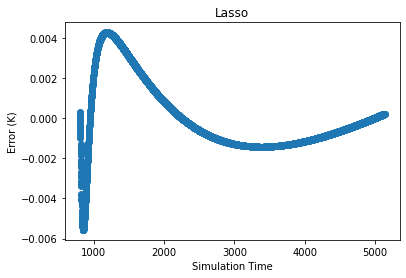

In [ ]:
d=scaler.inverse_transform(X_test)
a=scaler2.inverse_transform(y_test)
b=scaler2.inverse_transform([predict1])
plt.title("Lasso")
plt.ylabel("Error (K)")
plt.xlabel("Simulation Time")
plt.scatter(d[:,0], ((np.ravel(y_test)-predict1)))

In [ ]:
#RigdeCV is used to select the optimal alpha automatically
regr = linear_model.RidgeCV()
regr.fit(X_train, np.ravel(y_train))
#print weights for use in parameter reduction for future problems
print(regr.coef_)
#calculate RMSE values
predict1=regr.predict(X_test)
predicttrain=regr.predict(X_train)
RMSEtrain = mean_squared_error(predicttrain, y_train, squared=False)
RMSEtest = mean_squared_error(predict1, y_test, squared=False)
#3 fold cross validation for RMSE calculation
#RMSEcv1 = cross_validate(regr, X_train, np.ravel(y_train), cv=3, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
#RMSEcv=np.sqrt(-1/3*(RMSEcv1['test_neg_mean_squared_error'][0]+RMSEcv1['test_neg_mean_squared_error'][1]+RMSEcv1['test_neg_mean_squared_error'][2]))
print (RMSEtrain, RMSEtest)

[ 0.00027709  0.          0.          0.         -0.0005487   0.0079316
  0.         -0.00058522  0.00791861  0.          0.00136795  0.02003166
 -0.00125377 -0.00029108  0.00152374  0.00136795 -0.0001803  -0.00028318
 -0.00011968  0.         -0.0001803  -0.00028318 -0.00011968  0.
 -0.0001803   0.          0.          0.         -0.05765706  0.00480772
 -0.02370927 -0.02293442  0.          0.00480772 -0.02370927 -0.02293442
  0.          0.00480772  0.         -0.02293442  0.         -0.03380185
  0.          0.02083426  0.          0.          0.00027709  0.00045624
  0.00045787  0.00045319  0.07368366  0.07381285  0.07365151  0.
  0.0736833   0.07381351  0.07365145  0.          0.07382095  0.0157134
  0.07382095  0.0157134  -0.03059069 -0.03059069  0.07460767 -0.0007511
 -0.07459502 -0.02778766  0.00440144  0.00150479  0.         -0.07461449
 -0.02370927 -0.00556841  0.03262798  0.02047599  0.00138797  0.00434758
  0.00138797  0.00138797  0.02003166  0.00480772  0.00152374  0.
  0.0

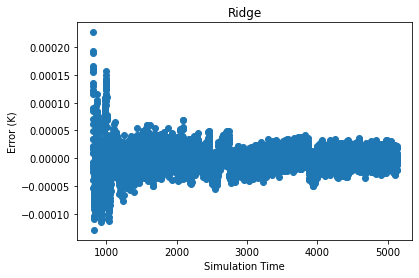

In [ ]:
d=scaler.inverse_transform(X_test)
a=scaler2.inverse_transform(y_test)
b=scaler2.inverse_transform([predict1])
plt.title("Ridge")
plt.ylabel("Error (K)")
plt.xlabel("Simulation Time")
plt.scatter(d[:,0], ((np.ravel(y_test)-predict1)))

In [ ]:
plt.ylabel("Outlet")
plt.xlabel("SG Inlet T")
#plt.scatter(X_test[:,71], np.ravel(y_test), label='test')
plt.plot(X_train[1:500,71], label='train')
plt.legend()
print (X_test[:,71])

[-0.3413895  -1.21780135  0.63889088 ... -2.77180628  0.23132039
 -1.29473705]


In [ ]:
plt.ylabel("Outlet")
plt.xlabel("SG Inlet T")
#plt.scatter(X_test[:,71], np.ravel(y_test), label='test')
plt.plot(X_test[1:500,71], label='test')
plt.legend()
print (X_test[:,71])

[-0.3413895  -1.21780135  0.63889088 ... -2.77180628  0.23132039
 -1.29473705]


In [ ]:
plt.ylabel("Outlet")
plt.xlabel("SG Inlet T")
plt.scatter(X_test[:,71], np.ravel(y_test), label='test')
plt.legend()

In [ ]:
df.iloc[:,80]

0        1490.288188
1        1490.288142
2        1490.288096
3        1490.288051
4        1490.288005
            ...     
43311    1490.277800
43312    1490.277800
43313    1490.277800
43314    1490.277800
43315    1490.277800
Name: TB_InSteamFlow, Length: 43316, dtype: float64

In [ ]:
#unscaled df = df[['Time', 'GN_GenElecPow', 'PZ_Press', 'RC1_PumpDiffPress', 'RC2_PumpDiffPress']]
df = df[['CC_PumpFlow', 'CC_PumpSpeed', 'INT_SimulationTime', 'RC1_PumpDiffPress', 'RC1_PumpFlow',
         'RC2_PumpFlow', 'RX_CL1Flow', 'RX_CL2Flow', 'RX_CladTemp', 'RX_FuelTemp',
         'RX_InCoolTemp', 'RX_OutCoolTemp', 'SG1_InletTemp']]

In [ ]:
regr = MLPRegressor(hidden_layer_sizes=(4, 3), random_state=1, max_iter=50000).fit(X_train, np.ravel(y_train))

In [ ]:
predict=regr.predict(X_test)
predicttrain = regr.predict(X_train)
score1=regr.score(X_train, y_train)
score2=regr.score(X_test, y_test)
print (score1, score2)

0.9998139212853785 0.9998138973955399


In [ ]:
d=scaler.inverse_transform(X_test)
a=scaler2.inverse_transform(y_test)
b=scaler2.inverse_transform([predict])
print(d)

[[1993.3           0.            0.         ... 5199.600149
   157.0796327    97.90162486]
 [1446.2           0.            0.         ... 5199.600599
   157.0796327    97.90151479]
 [3492.1           0.            0.         ... 5199.59997
   157.0796327    97.90162786]
 ...
 [ 833.8           0.            0.         ... 5199.565579
   157.0796327    97.90172159]
 [2611.1           0.            0.         ... 5199.6
   157.0796327    97.90164358]
 [1409.3           0.            0.         ... 5199.60065
   157.0796327    97.90150058]]


In [ ]:
ax=plt.subplots()
plt.ylabel("Actual (K)")
plt.xlabel("Predicted (K)")
plt.scatter(a, b)
plt.ticklabel_format(useOffset=False)

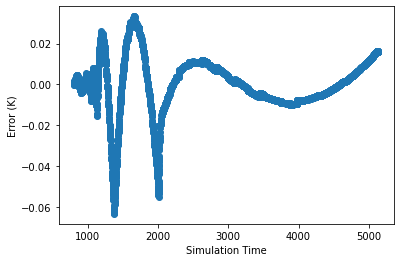

In [ ]:
plt.ylabel("Error (K)")
plt.xlabel("Simulation Time")
plt.scatter(d[:,0], ((np.ravel(y_test)-predict)))
#Add RMSE
# train with transients


In [ ]:
plt.title("Reactor Power")
plt.ylabel("Power Level (%)")
plt.xlabel("Simulation Time (s)")

plt.ylim(0, 110)
plt.scatter(d[:,0], d[:,67])
plt.ticklabel_format(useOffset=False)

In [ ]:
mean_squared_error(y_train, predicttrain, squared=False)

0.013633891946896739

In [ ]:
ddd